## Prerequisites

In [9]:
import matplotlib.pyplot
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In this notebook we will outline the analysis of simulation data for decay in heterozygosity of stochastic simulations of phage-host expansions, included in the most recent update for our pre-prin
**Virus-host interactions shape viral dispersal giving rise to distinct classes of travelling waves in spatial expansions
Michael Hunter, Tongfei Liu, Wolfram Möbius, Diana Fusco
bioRxiv 2020.09.23.310201; doi: https://doi.org/10.1101/2020.09.23.310201**

The following notebook will have the code needed to reporudce the analysis and figures seen in this publication provided that the nessecary simulation data is on hand. This notebook and the data should be available at https://github.com/FuscoLab/plaque_growth_sdes. We will first describe the simulation algorithm used to generate this data

Text(39, -7, 'Bacteria')

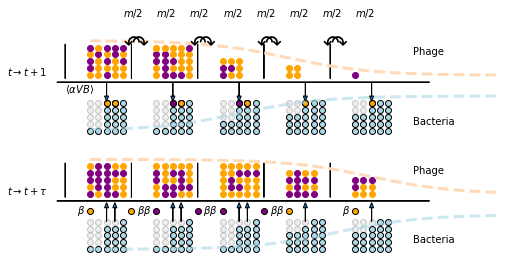

In [153]:
fig,axs = plt.subplots(2,1,figsize=(8,4))

ax=axs[0]

ax.axis('off')

profx =np.arange(50)
ax.plot(profx,(5/(1+np.exp(.2*(profx-24)))),lw=3,linestyle='--',c='peachpuff')

profx =np.arange(50)
ax.plot(profx,(5/(1+np.exp(-.2*(profx-18))))-8,lw=3,linestyle='--',c='lightblue',alpha=.6)

colors = ['purple','orange']
dims = [5,5,3,2,1]
for d,b in zip(np.array(dims),np.array([0,8,16,24,32])):
    for i in range(d):
        for j in range(d):
            ax.scatter(b+i,j,c=colors[np.random.randint(2)])
            


dimsy = [5,5,5,5,5]            
dimsx = [3,3,3,3,3]
for dx,dy,b in zip(np.array(dimsx),np.array(dimsy),np.array([0,8,16,24,32])):
    for i in range(dx):
        for j in range(dy):
            ax.scatter(b+2+i,-j-4,c='lightblue',edgecolor='k')
            
dimsy = [5,5,5,5,5]            
dimsx = [2,2,2,2,2]
for dx,dy,b in zip(np.array(dimsx),np.array(dimsy),np.array([0,8,16,24,32])):
    for i in range(dx):
        for j in range(dy):
            ax.scatter(b+i,-j-4,c='lightgrey',edgecolor='grey',alpha=.4)
dimsy = [1,1,2,3,3]            
dimsx = [2,2,2,2,2]
for dx,dy,b in zip(np.array(dimsx),np.array(dimsy),np.array([0,8,16,24,32])):
    for i in range(dx):
        for j in range(dy):
            ax.scatter(b+i,j-8,c='lightblue',edgecolor='k')

            
col_abs=[]
dims = [5,5,5,5,5]
for d,b in zip(np.array(dims),np.array([0,8,16,24,32])):
        col_abs.append(colors[np.random.randint(2)])
        ax.scatter(b+2,-4,c=col_abs[-1],edgecolor='k')
for d,b in zip(np.array(dims),np.array([0,8,16])):
        col_abs.append(colors[np.random.randint(2)])
        ax.scatter(b+3,-4,c=col_abs[-1],edgecolor='k')
        


for d,b in zip(np.array(dims),np.array([0,8,16])):
        ax.scatter(b+3,-4,c=colors[np.random.randint(2)],edgecolor='k')
            

            
for x in np.array([0,8,16,24]):
    ax.text(x+4,4,r'$\curvearrowleft$',fontsize=20)
    ax.text(x+4,8.5,r'$m/2$')
    ax.text(x+5,4,r'$\curvearrowright$',fontsize=20)
    ax.text(x+8,8.5,r'$m/2$')

#for x in np.array([0,10,20,30,40]):
ax.text(-3,-2.5, r'$\langle \alpha V B \rangle $')


for x in np.array([0,8,16,24,32]):
    ax.arrow(x-3,-.5,0,5,clip_on= False)
for x in np.array([0,8,16,24,32]):
    ax.arrow(x+2,-1,0,-2,clip_on= False, head_width=.5)
    

ax.arrow(-4,-1,45,0,clip_on= False)
ax.text(39, 3, 'Phage')
ax.text(39, -7, 'Bacteria')


ax.text(-10,0, r'$t \rightarrow t+1$')
#ax.text(-5, -5, 'Bacteria')

ax=axs[1]

profx =np.arange(50)
ax.plot(profx,(5/(1+np.exp(.2*(profx-34)))),lw=3,linestyle='--',c='peachpuff')
ax.plot(profx,(5/(1+np.exp(-.2*(profx-30))))-8,lw=3,linestyle='--',c='lightblue',alpha=.6)

ax.axis('off')
colors = ['purple','orange']
dims = [5,5,5,4,3]
for d,b in zip(np.array(dims),np.array([0,8,16,24,32])):
    for i in range(d):
        for j in range(d):
            ax.scatter(b+i,j,c=colors[np.random.randint(2)])
            
dimsy = [4,4,4,4,4]            
dimsx = [3,3,3,3,3]
for dx,dy,b in zip(np.array(dimsx),np.array(dimsy),np.array([0,8,16,24,32])):
    for i in range(dx):
        for j in range(dy):
            ax.scatter(b+2+i,-j-4-1,c='lightblue',edgecolor='k')
            
            
dimsy = [5,5,5,5,5]            
dimsx = [2,2,2,2,2]
for dx,dy,b in zip(np.array(dimsx),np.array(dimsy),np.array([0,8,16,24,32])):
    for i in range(dx):
        for j in range(dy):
            ax.scatter(b+i,-j-4,c='lightgrey',edgecolor='grey',alpha=.4)
            

dimsy = [1,1,1,3,3]            
dimsx = [2,2,2,2,2]
for dx,dy,b in zip(np.array(dimsx),np.array(dimsy),np.array([0,8,16,24,32])):
    for i in range(dx):
        for j in range(dy):
            ax.scatter(b+i,j-8,c='lightblue',edgecolor='k')
            
for b in np.array([0,8,16,24,32]):
    ax.scatter(b+ 4,-4,c='lightblue',edgecolor='k')
for b in np.array([24,32]):
    ax.scatter(b+ 3,-4,c='lightblue',edgecolor='k')
            
dims = [5,5,5,5,5]
for d,b in zip(np.array(dims),np.array([0,8,16,24,32])):
        ax.scatter(b+2,-4,c='lightgrey',edgecolor='grey',alpha=.4)
for d,b in zip(np.array(dims),np.array([0,8,16])):
        ax.scatter(b+3,-4,c='lightgrey',edgecolor='grey',alpha=.4)
            
col_cnt=0
for d,b in zip(np.array(dims),np.array([0,8,16,24,32])):
    ax.scatter(b,-2.5,c=col_abs[col_cnt],edgecolor='k')
    ax.text(b-1.6,-2.7, r'$\beta $')
    col_cnt+=1
    
for d,b in zip(np.array(dims),np.array([0,8,16])):
    ax.scatter(b+5,-2.5,c=col_abs[col_cnt],edgecolor='k')
    ax.text(b+5.7,-2.7, r'$\beta $')
    col_cnt+=1
    
for x in np.array([0,8,16,24,32]):
    ax.arrow(x-3,-.5,0,5,clip_on= False)
    
for x in np.array([0,8,16,24,32]):
    ax.arrow(x+2,-4,0,2,clip_on= False, head_width=.5)
    
for x in np.array([0,8,16]):
    ax.arrow(x+3,-4,0,2,clip_on= False, head_width=.5)
    

ax.arrow(-4,-1,45,0,clip_on= False)
ax.text(-10,0, r'$t \rightarrow t+\tau$')
ax.text(39, 3, 'Phage')
ax.text(39, -7, 'Bacteria')

Our simulation alogirthm is carried out on a one-dimensional lattice. A finite number of lattice sites are distributed along a line and contain a fixed number of Bacteria $B_0$. Each deme is also initialized with some number of phage. In each time step, there is a migration step in which a proportion $m/2$ phage from each deme are exchanged with each of its neighbors, an absorption step in which the number of absorbing phage is binomial sampled i each deme from the $B_i V_i$, with probability $\alpha$ to infected currently unifected bacteria within the deme, and a lysis step in which the infected bacteria's state is advanced one time step, and bacteria with state $\tau$ are labeled as lysed and $\beta$ new phage are inserted into the deme.

The simulation box is peroidically shifted with uninfected bacteria placed ahead of the population and demes with a steady state number of phage omitted, with the number of phage omitted, recorded. In this way the simulation box stays in the co-moving frame of the population. 

When the traveling wave is established, all the free and absorbed phage are randomly labeled with one of two neutrals labels. The Average heterozygosity in the simulation box $H(t) = \frac{1}{M}\sum^M_i 2f_i(1-f_i)$, where $M$ is the total number of demes in the simulation box, and the fraction of one allele in deme $i$ is given by $f_i$, and for the other allele $1-f_i$

We will next load in the data for heterozygosity measured in our simulations:

In [10]:
##Setup array for each parameter value simulated

alphas= np.array([.005,.01,0.03]) ##alpha*b0 values simulated
taul=4
taus = np.zeros((len(alphas),taul)) ##empty array for tau values simulated at each alpha
#taus=np.zeros((len(alphas),5))
#aBt_0 = 50*.03
#aBt_f = 200*.03
aBt_0 =50*.03 ## minimum value for alpha*b0
aBt_f = 200*.03  ## maximum value for alpha*b0
#populate array for tau values used given, minium,maximum, values of alpha*b0, and number of tau values used
for a,alpha in enumerate(alphas):
    taus[a] = np.linspace((aBt_0)/alpha,(aBt_f)/alpha,len(taus[0]))
taus=taus.astype(int) ##ensure they are all integers, as only integer tau was input to simulation

#taus = np.array([[100,200,500,800],[50,100,200,500],[50,100,200,500]])
Bsims= np.array([25,50,75,100]) ##all values of B0 simulated
samps = 500 ##number of samples for each condition

In [45]:
##check which data if any are missing
harr = np.zeros((len(Bsims),len(taus[0]),len(alphas), samps,20000 )) ##array for all heterosyzgosity decay data
missing= []
##iterate through each paramater in the sampled space
for a, alpha in enumerate(alphas):
    for t, tau in enumerate(taus[a].astype(int)):
        for B, Bsim in enumerate(Bsims):
            hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero*Nb'+str(Bsim)+'*tau'+str(tau)+'_alpha'+str(alpha)+'_*')
            cnt =0
            for ID in range(1,samps+1): 
                found = 0 
                for hf in hetf:
                    if ID ==int(hf.split('ID')[1].split('_')[0]):
                        found =1
                        cnt+=1
                        #np.loadtxt(hf)[:,1]
                        #print([tau,Bsim,alpha,ID] )
                        
                
                if found ==0:
                    missing.append([tau,Bsim,alpha,ID])
                    
            if cnt<500:
                print('hi')
        

In [46]:
if len(missing)>0:
    print('Missing files: ')
    print(missing)
else:
    print('No missing files')

No missing files


In [39]:
%%time
alpha= .005
tau =1200
Bsim=25
arrs = [] 
hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero*Nb'+str(Bsim)+'*tau'+str(tau)+'_alpha'+str(alpha)+'_*')
print(len(hetf))
for ID in range(1,samps+1):
    found=0
    for hf in hetf:
        if (ID ==int(hf.split('ID')[1].split('_')[0]) ) & (found==0):
            found =1
            arrs.append(np.loadtxt(hf)[:,1])
            print(ID)
            
ts_t= .1         
tf = np.sort([len(a) for a in arrs])[475]
arrm = np.zeros(tf)
cnt=0
for a in arrs:
    az =np.zeros(tf)
    az[:len(a)]=a[:tf]
    arrm+=az
    cnt+=1
if cnt<500:
    print('less than 500 samples found for', [alpha,tau,Bsim])
arrm = arrm/cnt
ts = np.argwhere(arrm<ts_t)[0][0]
        

500
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [12]:
ts_t= .1         
tf = np.sort([len(a) for a in arrs])[475]
arrm = np.zeros(tf)
cnt=0
for a in arrs:
    az =np.zeros(tf)
    az[:len(a)]=a[:tf]
    arrm+=az
    cnt+=1
if cnt<500:
    print('less than 500 samples found for', [alpha,tau,Bsim])
arrm = arrm/cnt
ts = np.argwhere(arrm<ts_t)[0][0]

<ipython-input-12-ff4361274e67>:13: RuntimeWarning: invalid value encountered in less
  ts = np.argwhere(arrm<ts_t)[0][0]


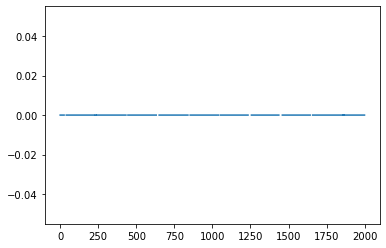

In [36]:
plt.plot(arrs[0][8000:10000])

In [40]:
cnt=0
for a in arrs:
    cnt+=1
    print(np.sum(np.isnan(a)))
    print(cnt)

0
1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
0
9
0
10
0
11
0
12
0
13
0
14
0
15
0
16
0
17
0
18
0
19
0
20
0
21
0
22
0
23
0
24
0
25
0
26
0
27
0
28
0
29
0
30
0
31
0
32
0
33
0
34
0
35
0
36
0
37
0
38
0
39
0
40
0
41
0
42
0
43
0
44
0
45
0
46
0
47
0
48
0
49
0
50
0
51
0
52
0
53
0
54
0
55
0
56
0
57
0
58
0
59
0
60
0
61
0
62
0
63
0
64
0
65
0
66
0
67
0
68
0
69
0
70
0
71
0
72
0
73
0
74
0
75
0
76
0
77
0
78
0
79
0
80
0
81
0
82
0
83
0
84
0
85
0
86
0
87
0
88
0
89
0
90
0
91
0
92
0
93
0
94
0
95
0
96
0
97
0
98
0
99
0
100
0
101
0
102
0
103
0
104
0
105
0
106
0
107
0
108
0
109
0
110
0
111
0
112
0
113
0
114
0
115
0
116
0
117
0
118
0
119
0
120
0
121
0
122
0
123
0
124
0
125
0
126
0
127
0
128
0
129
0
130
0
131
0
132
0
133
0
134
0
135
0
136
0
137
0
138
0
139
0
140
0
141
0
142
0
143
0
144
0
145
0
146
0
147
0
148
0
149
0
150
0
151
0
152
0
153
0
154
0
155
0
156
0
157
0
158
0
159
0
160
0
161
0
162
0
163
0
164
0
165
0
166
0
167
0
168
0
169
0
170
0
171
0
172
0
173
0
174
0
175
0
176
0
177
0
178
0
179
0
180
0
181
0
182
0
183
0
184
0
18

In [210]:
tf = np.sort([len(a) for a in arrs])[400]

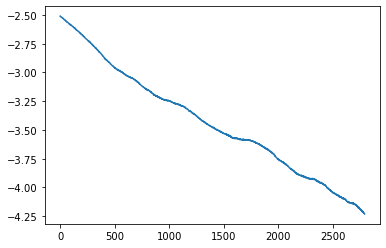

In [252]:
plt.plot(np.log(arrm[ts:tf]))

In [ ]:
alpha= .03
tau =50
Bsim=100
ts_t= .1
arrms = []
cnt1=0
for a, alpha in enumerate(alphas):
    for t, tau in enumerate(taus[a].astype(int)):
        for B, Bsim in enumerate(Bsims):
            arrs = []
            hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero*Nb'+str(Bsim)+'*tau'+str(tau)+'_alpha'+str(alpha)+'_*')
            print(len(hetf))
            for ID in range(1,samps+1):
                found =0 
                for hf in hetf:
                    if (ID ==int(hf.split('ID')[1].split('_')[0]) ) & (found==0):
                        fount =1
                        arrs.append(np.loadtxt(hf)[:,1])
                        #print(ID)

            tf = np.sort([len(a) for a in arrs])[475]
            arrm = np.zeros(tf)
            cnt=0
            for a in arrs:
                az =np.zeros(tf)
                az[:len(a)]=a[:tf]
                arrm+=az
                cnt+=1
                if np.sum(np.isnan(a))>0:
                    print('nans founds')
                    print([Bsim,alpha,tau,ID])

            if cnt<500:
                print('less than 500 samples found for', [alpha,tau,Bsim])
            arrm = arrm/cnt
            ts = np.argwhere(arrm<ts_t)[0][0]
            
            arrms.append(np.array([np.array([alpha,tau,Bsim]),arrm[ts:tf]]))
            cnt1+=1
            print(str(cnt1)+"out of " +str(len(alphas)*len(taus)*len(Bsims)))

500
1out of 36
500
2out of 36
500
3out of 36
500
4out of 36
500
5out of 36
500
6out of 36
500
7out of 36
500
8out of 36
996
9out of 36
500
10out of 36
500
11out of 36
500
12out of 36
500
13out of 36
500
14out of 36
500
15out of 36
500


In [7]:
for a, alpha in enumerate(alphas):
    for t, tau in enumerate(taus[a].astype(int)):
        for B, Bsim in enumerate(Bsims):
            print(Bsim,tau,alpha)

25 300 0.005
50 300 0.005
75 300 0.005
100 300 0.005
25 600 0.005
50 600 0.005
75 600 0.005
100 600 0.005
25 900 0.005
50 900 0.005
75 900 0.005
100 900 0.005
25 1200 0.005
50 1200 0.005
75 1200 0.005
100 1200 0.005
25 150 0.01
50 150 0.01
75 150 0.01
100 150 0.01
25 300 0.01
50 300 0.01
75 300 0.01
100 300 0.01
25 450 0.01
50 450 0.01
75 450 0.01
100 450 0.01
25 600 0.01
50 600 0.01
75 600 0.01
100 600 0.01
25 50 0.03
50 50 0.03
75 50 0.03
100 50 0.03
25 100 0.03
50 100 0.03
75 100 0.03
100 100 0.03
25 150 0.03
50 150 0.03
75 150 0.03
100 150 0.03
25 200 0.03
50 200 0.03
75 200 0.03
100 200 0.03


In [30]:
len(arrs)

996

In [187]:
%% time
harr = np.zeros((len(Bsims),len(taus[0]),len(alphas), samps,20000 )) ##array for all heterosyzgosity decay data
missing= []
##iterate through each paramater in the sampled space
for a, alpha in enumerate(alphas):
    for t, tau in enumerate(taus[a].astype(int)):
        for B, Bsim in enumerate(Bsims):
            for ID in range(1,samps+1): 
                found =0 
                for hf in hetf:
                    if ID ==int(hf.split('ID')[1].split('_')[0]):
                #hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero*Nb'+str(Bsim)+'*tau'+str(tau)+'_alpha'+str(alpha)+'_*ID'+str(ID)+'*')
                #if len(hetf)>0:
                        arrs.append(np.loadtxt(hf)[:,1])
                        found =1
                if found ==0:
                    missing.append([tau,Bsim,alpha,ID])
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450


364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140


42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
30

213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462


388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164


68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325


253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
1
2
3
4


415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191


KeyboardInterrupt: 

In [ ]:
glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/hetero*Nb*')

In [3]:
tau = 50
Bsim = 25
alpha=0.03
ID=263
#tau = 100
#Bsim = 50
#alpha=0.03
#ID=447
glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/hetero*Nb*')

['/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/hetero_Nb100_migr0.25+_tau100_alpha0.03_ID441_demes200_2021-02-05-04-30-21.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/hetero_Nb100_migr0.25+_tau100_alpha0.03_ID677_demes200_2021-02-05-04-36-45.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/hetero_Nb100_migr0.25+_tau100_alpha0.03_ID994_demes200_2021-02-04-21-48-10.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/hetero_Nb100_migr0.25+_tau50_alpha0.03_ID909_demes200_2021-02-05-04-07-02.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/hetero_Nb100_migr0.25+_tau50_alpha0.03_ID997_demes200_2021-02-05-04-07-04.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/hetero_Nb100_migr0.25+_tau50_alpha0.03_ID358_demes200_2021-02-04-18-58-26.txt',
 '/Users/nikhilkrishnan/Dropbox

In [8]:
#tau = 50
#Bsim = 25
#alpha=0.03
#ID=263
tau = 100
Bsim = 50
alpha=0.03
ID=447
glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/velocity*Nb'+str(Bsim)+'*tau'+str(tau)+'_alpha'+str(alpha)+'_*ID'+str(ID)+'*')

[]

It is expected that heterozygosity decays due to genetic drift in our simulations. We are interested in how this rate of decay depends on population parameters. Population parameters also control how much variation there is in heterozygosity between simulation and how long the transient period lasts before heterozygosity begins to exponential decay. We expect that heterozygosity $H(t)$ within a certain range of $t \in {(t_s,t_f)}$, will be approximately $H(t) = Ae^{-\Lambda(t+B)} +C$, where $A$, $B$, and $C$ are constants. With variable transient periods, $A$ and $B$ are unknown, but we assumed $C$ to be 0, that is that heterozygosity will always decay to 0 as one of the alleles goes extinct

To estimate $\Lambda$, we can simply take the log of our data, which we expect to be approximated by $\ln H(t) = \ln{A} +  -\Lambda(t+B)$. Combining constant terms, we can find $\Lambda$ by simply performing a linear fit to $\ln H(t)$:  $$\ln H(t)= -\Lambda t +const. $$

To perform this fit we can graph our data to ensure that our choice of $t_s$ and $t_f$ provide access to the exponential decay regime, while a sufficeint number of our 1000 samples are non-zero.

<ipython-input-225-c8e73dce827d>:20: RuntimeWarning: divide by zero encountered in log
  y=np.log(np.mean(harr[0,i,0,:,:tf],axis=0))
<ipython-input-225-c8e73dce827d>:20: RuntimeWarning: divide by zero encountered in log
  y=np.log(np.mean(harr[0,i,0,:,:tf],axis=0))


Text(0.5, 0, 'Time (time steps)')

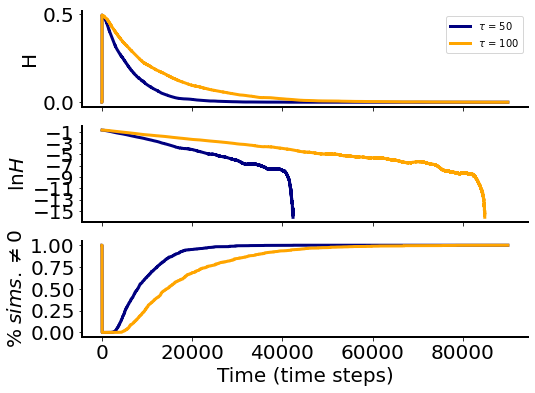

In [225]:
fig,axs = plt.subplots(3,1,figsize=(8,6),sharex=True)
colors = ['navy', 'orange', 'purple', 'maroon','grey']
ax=axs[0]
tf=90000
alpha = 0.03
B0 =100
a = np.argwhere(alphas==alpha)[0][0]
B =  np.argwhere(Bsims==B0)[0][0]
for i in range(2):
    #ax.plot(np.mean(harr[0,i,:,:300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    y=np.mean(harr[B,i,a,:,:tf],axis=0)
    ax.plot(np.arange(0,tf*1,1),y,lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[a][i]))
    #ax.plot(np.mean(harr[1,i,1,:,:5\300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
ax.legend()
ax.set_ylabel('H',fontsize=20)
ax=axs[1]

for i in range(2):

    y=np.log(np.mean(harr[0,i,0,:,:tf],axis=0))
    ax.plot(np.arange(0,tf*1,1)[:len(y)],y,lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[a][i]))

    ax.set_yticks(np.arange(-15,0,2))
ax.set_ylabel('$\ln H$',fontsize=20)
ax=axs[2]

for i in range(2):
    ax.plot(np.sum(harr[0,i,0,:,:tf]==0,axis=0) /1000,lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[a][i]))
    ax.set_yticks(np.linspace(0,1,5))
    
for ax in axs:
    for axis in ['left','bottom']:
        ax.spines[axis].set_linewidth(2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylabel(r'$ \% \; sims. \neq 0 $',fontsize=20)
ax.set_xlabel('Time (time steps)',fontsize=20)

<ipython-input-485-b18c03d4e215>:8: RuntimeWarning: divide by zero encountered in log
  y=np.log(np.mean(harr[0,1,0,:,:100000],axis=0))
<ipython-input-485-b18c03d4e215>:33: RuntimeWarning: overflow encountered in exp
  popt, pcov = curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,xe[ts:tf],  ye[ts:tf],  p0=(.1, -0.001,.00001))


Text(0.5, 0, 'Time (time steps)')

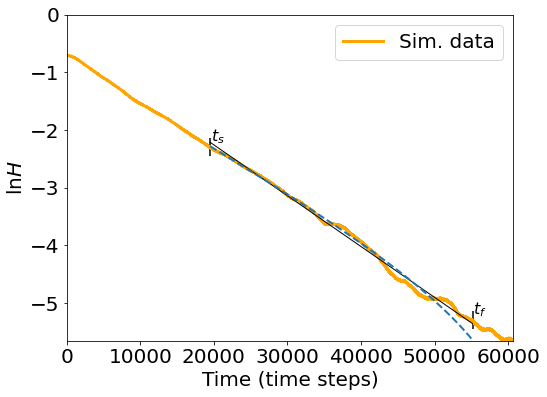

In [485]:
from scipy.optimize import curve_fit

fig,ax = plt.subplots(1,figsize=(8,6),sharex=True)
colors = ['navy', 'orange', 'purple', 'maroon','grey']


    #ax.plot(np.mean(harr[0,i,:,:300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
y=np.log(np.mean(harr[0,1,0,:,:100000],axis=0))
x=np.arange(0,100000*1,1)[:len(y)]
ax.plot(x,y,lw=3,c = colors[1],label=r'Sim. data')
ax.legend()

hts=np.log(0.1)
htf=np.log(0.005)
ts=np.argwhere(y>hts)[-1][0]+5
tf=np.argwhere(y>htf)[-1][0]
#tf=np.argwhere(~np.isinf(y))[-1][0]
htf=y[tf]
ax.scatter(x[ts],hts,marker='|',s=350,c='k')
ax.scatter(x[tf],htf,marker='|',s=350,c='k')
ax.text(x[ts]+40,hts+.1,s='$t_s$',fontsize=16)
ax.text(x[tf]+40,htf+.1,s='$t_f$',fontsize=16)
tt=ts+int((tf-ts)/2)

##linear fit for transofred data
lam,c =np.polyfit(x[ts:tf],y[ts:tf],1)
ax.plot(x[ts:tf], lam*x[ts:tf]+c,c ='k',lw=1)


##exponential fit,linearized
ye =np.mean(harr[0,1,0,:,:100000],axis=0)
xe=np.arange(0,100000*1,1)[:len(ye)]
popt, pcov = curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,xe[ts:tf],  ye[ts:tf],  p0=(.1, -0.001,.00001))
plt.plot(xe[ts:tf],  np.log(popt[0]*np.exp(popt[1]*xe[ts:tf])+popt[2]),linestyle='--',lw=2)

ax.set_xlim([0,tf*1.1])
ax.set_ylim([y[int(tf*1.1)],0])
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend(fontsize=20)
ax.set_ylabel('$\lnH$',fontsize=20)
ax.set_xlabel('Time (time steps)',fontsize=20)

For each condition, we select the appropriate $t_s$ and $t_f$, transform the data and perform a linear fit to find $\Lambda$. We also perform an expontential fit to the form $y= A \exp(-\Lambda t )+B$, using the scipy curve-fitting package

In [18]:
datal= np.zeros((len(Bsims),len(taus[0]),len(alphas)))
datae= np.zeros((len(Bsims),len(taus[0]),len(alphas)))
tss = np.array([0.1,0.1,0.1,0.1])

for B, Bsim in enumerate(Bsims):
    for a, alpha in enumerate(alphas):
        for t, tau in enumerate(taus[a]):
            #for n in rannge(samp):
            try:
                y = np.log(np.mean(harr[B,t,a,:,:],axis=0))
                #x=np.arange(0,100000*1,1)[:len(y)]

                hts=np.log(0.1)
                htf=np.log(0.005)
                ts=np.argwhere(y > hts)[-1][0]+5
                tf=np.argwhere(y>htf)[-1][0]

                datal[B,t,a] = -np.polyfit(np.arange(len(y[ts:tf]) ),y[ts:tf],1)[0]

                ye =np.mean(harr[B,t,a,:,:],axis=0)
                xe=np.arange(len(ye[ts:tf]) )
                popt, pcov = curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,xe,  ye[ts:tf],  p0=(.1, -0.001,.00001))
                #plt.plot(xe[ts:tf],  np.log(popt[0]*np.exp(popt[1]*xe[ts:tf])+popt[2]),linestyle='--',lw=2)
                datae[B,t,a]=-popt[1]
            except:
                print(Bsim,tau,alpha,)


            

<ipython-input-18-29b26c49e1c0>:10: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.mean(harr[B,t,a,:,:],axis=0))


25 100 0.005
25 200 0.005
25 500 0.005
25 800 0.005
25 50 0.01
25 100 0.01
25 200 0.01
25 500 0.01
25 50 0.03
25 100 0.03
25 200 0.03
25 500 0.03
50 100 0.005
50 200 0.005
50 500 0.005
50 800 0.005
50 50 0.01
50 100 0.01
50 200 0.01
50 500 0.01
50 50 0.03
50 100 0.03
50 200 0.03
50 500 0.03
75 100 0.005
75 200 0.005
75 500 0.005
75 800 0.005
75 50 0.01
75 100 0.01
75 200 0.01
75 500 0.01
75 50 0.03
75 100 0.03
75 200 0.03
75 500 0.03
100 100 0.005
100 200 0.005
100 500 0.005
100 800 0.005
100 50 0.01
100 100 0.01
100 200 0.01
100 500 0.01
100 50 0.03
100 100 0.03
100 200 0.03
100 500 0.03


In [22]:
datal

array([[[0.        , 0.0102159 , 0.00990731],
        [0.        , 0.00683067, 0.00655564],
        [0.        , 0.00440295, 0.00422287],
        [0.        , 0.00249955, 0.00233987]],

       [[0.00704955, 0.01017765, 0.00965826],
        [0.0045753 , 0.0068064 , 0.00649385],
        [0.00267433, 0.00449312, 0.00428321],
        [0.00205617, 0.00254609, 0.00241017]],

       [[0.00683895, 0.00993393, 0.00960543],
        [0.00452636, 0.00679903, 0.0064722 ],
        [0.00262738, 0.00440227, 0.00418618],
        [0.00205472, 0.00263598, 0.00245617]],

       [[0.00683414, 0.00993401, 0.0095966 ],
        [0.00453404, 0.00665489, 0.00630531],
        [0.00272501, 0.00447338, 0.00421562],
        [0.00200994, 0.00260586, 0.00245539]]])

As $\Lambda$ describes the rate of diversity loss, parameters that control $\Lambda$ can be viewed as changing the effective population size $N_e$. To illustrate this, we note that in a well-mixed population under neutral evolution the fixation probability of a single mutant is controlled only by the population size. Analagously to this effect, parameters that change the effect of neutral evolution in a population can be interpreted as changing the effective population and for this purpose we define $N_e \equiv 1/\Lambda$. We see below how increased implicit density dependence can increase the effective population.

NameError: name 'data' is not defined

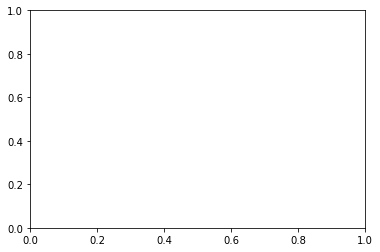

In [25]:
fig,ax=plt.subplots()
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(data)
lmin=1/np.max(data)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        im= plt.scatter(Bsim,(tau*.01/Bsim), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        #im= ax.scatter(Bsim,(tau*.03/Bsim), c = 1/data[B,t,1],cmap=colormap,norm=normalize,s=100)


ax.grid()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$B_0$',fontsize=20)
ax.set_ylabel(r'$\alpha \tau$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


cbaxes = fig.add_axes([1, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(im, cax = cbaxes) 
cbaxes.set_ylabel('$1/\Lambda$ ',fontsize=20)
#y_ticks=np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)
#y_ticklabes= np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)/10000
#cbaxes.set_yticks([5000,10000,15000,20000,25000],fontsize=20)
#cb.set_ticks(y_ticks)
#cbaxes.set_yticklabels([str(n) for n in y_ticklabes[:-1]]+[str(y_ticklabes[-1])+r"$\times 10^4 $"],fontsize=20)

<ipython-input-34-163213d2ff3b>:5: RuntimeWarning: divide by zero encountered in double_scalars
  lmax=1/np.min(datal)
<ipython-input-34-163213d2ff3b>:16: RuntimeWarning: divide by zero encountered in double_scalars
  ax.scatter(taus[0][t]*0.005,1/datal[B,t,0],cmap=colormap,norm=normalize,s=50,marker=markers[B],c=colors[0])


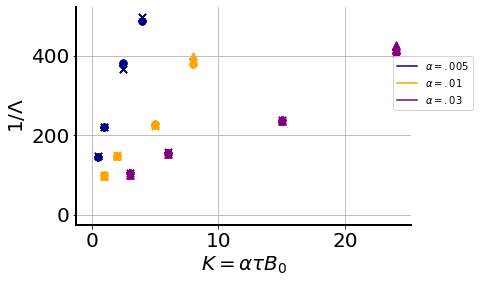

In [34]:
fig,ax=plt.subplots()
markers=["^","+","o","x"]
colors = ['navy', 'orange', 'purple', 'maroon','grey']
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(datal)
lmin=1/np.max(datal)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)
ax.plot(0,0,c='darkblue',label= r'$\alpha = .005$')
ax.plot(0,0,c='orange',label= r'$\alpha = .01$')
ax.plot(0,0,c='purple',label= r'$\alpha = .03$')

for a,alpha in enumerate(alphas):
    for t,tau in enumerate(taus[a]):
        for B, Bsim in enumerate(Bsims):
            #ax.scatter(taus[0][t]*0.01,1/data[B,t,0],cmap=colormap,norm=normalize,s=50,marker=markers[B],c='darkblue')
            ax.scatter(taus[0][t]*0.005,1/datal[B,t,0],cmap=colormap,norm=normalize,s=50,marker=markers[B],c=colors[0])
            ax.scatter(taus[0][t]*0.01,1/datal[B,t,1],cmap=colormap,norm=normalize,s=50,marker=markers[B],c=colors[1])
            ax.scatter(taus[0][t]*0.03,1/datal[B,t,2],cmap=colormap,norm=normalize,s=50,marker=markers[B],c=colors[2])

        
ax.plot()
ax.grid()
ax.legend(bbox_to_anchor=(1.2,.8))

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$K = \alpha \tau B_0$',fontsize=20)
ax.set_ylabel(r'$1/ \Lambda$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)

ax.yaxis.set_tick_params(labelsize=20)



<ipython-input-44-0aae725eae3b>:5: RuntimeWarning: divide by zero encountered in double_scalars
  lmax=1/np.min(datal)


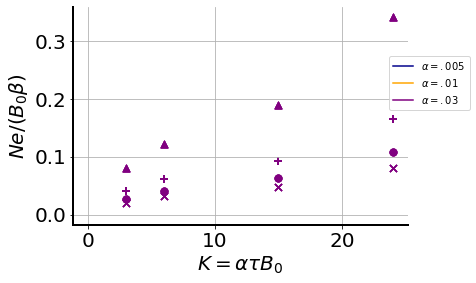

In [44]:
fig,ax=plt.subplots()
markers=["^","+","o","x"]
colors = ['navy', 'orange', 'purple', 'maroon','grey']
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(datal)
lmin=1/np.max(datal)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)
ax.plot(0,0,c='darkblue',label= r'$\alpha = .005$')
ax.plot(0,0,c='orange',label= r'$\alpha = .01$')
ax.plot(0,0,c='purple',label= r'$\alpha = .03$')

for a,alpha in enumerate(alphas):
    for t,tau in enumerate(taus[a]):
        for B, Bsim in enumerate(Bsims):
            #ax.scatter(taus[0][t]*0.01,1/data[B,t,0],cmap=colormap,norm=normalize,s=50,marker=markers[B],c='darkblue')
            #ax.scatter(taus[0][t]*0.005,(1/datal[B,t,0])/(Bsim*50),cmap=colormap,norm=normalize,s=50,marker=markers[B],c=colors[0])
            #ax.scatter(taus[0][t]*0.01,1/datal[B,t,1]/(Bsim*50),cmap=colormap,norm=normalize,s=50,marker=markers[B],c=colors[1])
            ax.scatter(taus[0][t]*0.03,1/datal[B,t,2]/(Bsim*50),cmap=colormap,norm=normalize,s=50,marker=markers[B],c=colors[2])

        
ax.plot()
ax.grid()
ax.legend(bbox_to_anchor=(1.2,.8))

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$K = \alpha \tau B_0$',fontsize=20)
ax.set_ylabel(r'$Ne / (B_0 \beta )$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)

ax.yaxis.set_tick_params(labelsize=20)




In [37]:
Bsim

100

Increased population size also increases effective population. We can demonstrate that effective population icnreases independent of this effect. In a sFKPP model, with a fixed carring capacity, the effective population can simply be divided by the carrying capacity to show this. In our model oh phage dynamics, the maximum number of phage in a deme will saturate approximately at $B_0 \beta$. This, however, is an approximation and especially with large $\tau$ and $\alpha$, the steady state population in the bulk will likely e lower than this. We can use our simulation observations instead for this purpose, by measuring the 
average population in the bulk of the wave and taking this as the approximate population size. 

We load the profile data below:

In [534]:


profarr = np.zeros((len(Bsims),len(taus[0]),len(alphas), samps,200 )) ##array for all heterosyzgosity decay data

##iterate through each paramater in the sampled space
for a, alpha in enumerate(alphas):
    for t, tau in enumerate(taus[a].astype(int)):
        for B, Bsim in enumerate(Bsims):
            for ID in range(1,samps+1):
                 
                try:
                    ##for each parameter value and each sample load the relevant file
                    proff = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/profile_phage*Nb'+str(Bsim)+'*tau'+str(tau)+'_alpha'+str(alpha)+'_*ID'+str(ID)+'*')
                    ##assign just the het. data to the array (index 1 , time values are in index 0)
                    arr = np.loadtxt(proff[0])[:,1]
                    profarr[B,t,a,ID-1,:len(arr)]=arr
                except:
                    #print( values for missing data)
                    print(tau,Bsim,alpha,ID)

        

50 100 0.03 1
50 100 0.03 2
50 100 0.03 3
50 100 0.03 4
50 100 0.03 5
50 100 0.03 6
50 100 0.03 7
50 100 0.03 8
50 100 0.03 9
50 100 0.03 10
50 100 0.03 11
50 100 0.03 12
50 100 0.03 13
50 100 0.03 14
50 100 0.03 15
50 100 0.03 16
50 100 0.03 17
50 100 0.03 18
50 100 0.03 19
50 100 0.03 20
50 100 0.03 21
50 100 0.03 22
50 100 0.03 23
50 100 0.03 24
50 100 0.03 25
50 100 0.03 26
50 100 0.03 27
50 100 0.03 28
50 100 0.03 29
50 100 0.03 30
50 100 0.03 31
50 100 0.03 32
50 100 0.03 33
50 100 0.03 34
50 100 0.03 35
50 100 0.03 36
50 100 0.03 37
50 100 0.03 38
50 100 0.03 39
50 100 0.03 40
50 100 0.03 41
50 100 0.03 42
50 100 0.03 43
50 100 0.03 44
50 100 0.03 45
50 100 0.03 46
50 100 0.03 47
50 100 0.03 48
50 100 0.03 49
50 100 0.03 50
50 100 0.03 51
50 100 0.03 52
50 100 0.03 53
50 100 0.03 54
50 100 0.03 55
50 100 0.03 56
50 100 0.03 57
50 100 0.03 58
50 100 0.03 59
50 100 0.03 60
50 100 0.03 61
50 100 0.03 62
50 100 0.03 63
50 100 0.03 64
50 100 0.03 65
50 100 0.03 66
50 100 0.03 67
50 1

50 100 0.03 523
50 100 0.03 524
50 100 0.03 525
50 100 0.03 526
50 100 0.03 527
50 100 0.03 528
50 100 0.03 529
50 100 0.03 530
50 100 0.03 531
50 100 0.03 532
50 100 0.03 533
50 100 0.03 534
50 100 0.03 535
50 100 0.03 536
50 100 0.03 537
50 100 0.03 538
50 100 0.03 539
50 100 0.03 540
50 100 0.03 541
50 100 0.03 542
50 100 0.03 543
50 100 0.03 544
50 100 0.03 545
50 100 0.03 546
50 100 0.03 547
50 100 0.03 548
50 100 0.03 549
50 100 0.03 550
50 100 0.03 551
50 100 0.03 552
50 100 0.03 553
50 100 0.03 554
50 100 0.03 555
50 100 0.03 556
50 100 0.03 557
50 100 0.03 558
50 100 0.03 559
50 100 0.03 560
50 100 0.03 561
50 100 0.03 562
50 100 0.03 563
50 100 0.03 564
50 100 0.03 565
50 100 0.03 566
50 100 0.03 567
50 100 0.03 568
50 100 0.03 569
50 100 0.03 570
50 100 0.03 571
50 100 0.03 572
50 100 0.03 573
50 100 0.03 574
50 100 0.03 575
50 100 0.03 576
50 100 0.03 577
50 100 0.03 578
50 100 0.03 579
50 100 0.03 580
50 100 0.03 581
50 100 0.03 582
50 100 0.03 583
50 100 0.03 584
50 100 0

100 100 0.03 37
100 100 0.03 38
100 100 0.03 39
100 100 0.03 40
100 100 0.03 41
100 100 0.03 42
100 100 0.03 43
100 100 0.03 44
100 100 0.03 45
100 100 0.03 46
100 100 0.03 47
100 100 0.03 48
100 100 0.03 49
100 100 0.03 50
100 100 0.03 51
100 100 0.03 52
100 100 0.03 53
100 100 0.03 54
100 100 0.03 55
100 100 0.03 56
100 100 0.03 57
100 100 0.03 58
100 100 0.03 59
100 100 0.03 60
100 100 0.03 61
100 100 0.03 62
100 100 0.03 63
100 100 0.03 64
100 100 0.03 65
100 100 0.03 66
100 100 0.03 67
100 100 0.03 68
100 100 0.03 69
100 100 0.03 70
100 100 0.03 71
100 100 0.03 72
100 100 0.03 73
100 100 0.03 74
100 100 0.03 75
100 100 0.03 76
100 100 0.03 77
100 100 0.03 78
100 100 0.03 79
100 100 0.03 80
100 100 0.03 81
100 100 0.03 82
100 100 0.03 83
100 100 0.03 84
100 100 0.03 85
100 100 0.03 86
100 100 0.03 87
100 100 0.03 88
100 100 0.03 89
100 100 0.03 90
100 100 0.03 91
100 100 0.03 92
100 100 0.03 93
100 100 0.03 94
100 100 0.03 95
100 100 0.03 96
100 100 0.03 97
100 100 0.03 98
100 100 

100 100 0.03 523
100 100 0.03 524
100 100 0.03 525
100 100 0.03 526
100 100 0.03 527
100 100 0.03 528
100 100 0.03 529
100 100 0.03 530
100 100 0.03 531
100 100 0.03 532
100 100 0.03 533
100 100 0.03 534
100 100 0.03 535
100 100 0.03 536
100 100 0.03 537
100 100 0.03 538
100 100 0.03 539
100 100 0.03 540
100 100 0.03 541
100 100 0.03 542
100 100 0.03 543
100 100 0.03 544
100 100 0.03 545
100 100 0.03 546
100 100 0.03 547
100 100 0.03 548
100 100 0.03 549
100 100 0.03 550
100 100 0.03 551
100 100 0.03 552
100 100 0.03 553
100 100 0.03 554
100 100 0.03 555
100 100 0.03 556
100 100 0.03 557
100 100 0.03 558
100 100 0.03 559
100 100 0.03 560
100 100 0.03 561
100 100 0.03 562
100 100 0.03 563
100 100 0.03 564
100 100 0.03 565
100 100 0.03 566
100 100 0.03 567
100 100 0.03 568
100 100 0.03 569
100 100 0.03 570
100 100 0.03 571
100 100 0.03 572
100 100 0.03 573
100 100 0.03 574
100 100 0.03 575
100 100 0.03 576
100 100 0.03 577
100 100 0.03 578
100 100 0.03 579
100 100 0.03 580
100 100 0.03 5

In [535]:
proff

['/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/profile_phage_Nb100_migr0.25+_tau100_alpha0.03_ID1000_demes200_2021-02-05-04-42-54.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/profile_phage_Nb100_migr0.25+_tau100_alpha0.03_ID1000_demes200_2021-02-04-21-48-10.txt']

In [513]:
a = .03/50
b0=100
beta = 50
tau=50

In [514]:
r = a*b0*((beta-1)/tau)
N=b0*beta
D=0.25/2

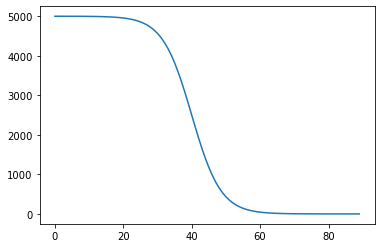

In [515]:
plt.plot(N/(1+np.exp((r/(2*D)) *np.arange(-40,50))))

In [520]:
1/datal

array([[[ 5470.93242587],
        [11345.16052244]]])

In [510]:
1/datal

array([[[ 5470.93242587],
        [11345.16052244]]])

In [517]:
1/datae

array([[[ 4481.41265907],
        [13320.91458277]]])

In [531]:
proff = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/prof*')

In [532]:
proff

['/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/profile_bac_Nb100_migr0.25+_tau100_alpha0.03_ID149_demes200_2021-02-04-20-22-53.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/profile_phage_Nb100_migr0.25+_tau100_alpha0.03_ID586_demes200_2021-02-04-20-57-27.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/profile_phage_Nb100_migr0.25+_tau50_alpha0.03_ID19_demes200_2021-02-05-03-20-41.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/profile_phage_Nb100_migr0.25+_tau100_alpha0.03_ID882_demes200_2021-02-05-04-42-35.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/profile_phage_Nb100_migr0.25+_tau50_alpha0.03_ID503_demes200_2021-02-04-19-11-57.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/wrong_thresh/profile_phage_Nb100_migr0.25+_tau50_alpha0.03_ID473_demes200_2021-02-05-03-40-3